# Multi-layer Perceptron
The Multi-layer Perceptron (MLP) is a type of feedforward neural network that uses
multiple layers of interconnected nodes or "neurons" to process inputs. Each layer
of the network applies a different set of weights and biases to the inputs, allowing
the network to learn complex relationships between inputs and outputs.
## MLP Architecture
The MLP architecture consists of multiple layers, each with its own set of weights and biases. The layers
are connected in a feedforward manner, meaning that the output of each layer is fed into the next layer. The number of layers and the number of nodes in each layer can be adjusted to suit the problem being solved.
## MLP Training
The MLP is trained using a supervised learning algorithm, where the network is presented with a set of input
data and corresponding output data. The network learns to minimize the difference between its predictions and the actual outputs
## Prominent Applications of Multi-Layer Perceptrons (MLP)

### 1. **Classification Tasks**
   - Handwritten digit recognition (e.g., MNIST dataset)
   - Sentiment analysis in text data
   - Image classification

### 2. **Regression Problems**
   - Stock price prediction
   - House price estimation
   - Weather forecasting

### 3. **Natural Language Processing (NLP)**
   - Language translation
   - Spam email detection
   - Named entity recognition

### 4. **Computer Vision**
   - Facial recognition
   - Object detection
   - Medical image analysis

### 5. **Anomaly Detection**
   - Fraud detection in banking
   - Network intrusion detection
   - Manufacturing defect identification

### 6. **Recommendation Systems**
   - Personalized movie recommendations
   - E-commerce product suggestions
   - Music recommendation platforms

### 7. **Robotics & Autonomous Systems**
   - Path planning in robotics
   - Autonomous vehicle navigation
   - Sensor data fusion

### 8. **Signal Processing**
   - Speech recognition
   - Noise reduction in audio signals
   - EEG-based brain signal classification

### 9. **Finance and Business Analytics**
   - Credit scoring models
   - Algorithmic trading
   - Customer churn prediction

### 10. **Healthcare & Medical Diagnosis**
   - Disease prediction from patient data
   - Drug discovery and development
   - Personalized treatment recommendation

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Preprocessing
# Converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# Selecting features and target (predicting 'tip' based on other features)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', 
                          input_shape=(X_train.shape[1],)), # Input layer
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error: ', loss[0])

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 10.1533 - mae: 2.8184
Epoch 2/100
7/7 [==============================] - 0s 136us/step - loss: 8.2300 - mae: 2.4552
Epoch 3/100
7/7 [==============================] - 0s 492us/step - loss: 6.5923 - mae: 2.1058
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 5.1122 - mae: 1.7689
Epoch 5/100
7/7 [==============================] - 0s 697us/step - loss: 3.8768 - mae: 1.4885
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 2.8920 - mae: 1.2530
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 2.2746 - mae: 1.1038
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 1.8026 - mae: 1.0067
Epoch 9/100
7/7 [==============================] - 0s 2ms/step - loss: 1.5942 - mae: 0.9500
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4455 - mae: 0.9011
Epoch 11/100
7/7 [==============================] - 0s 2ms/step - loss: 

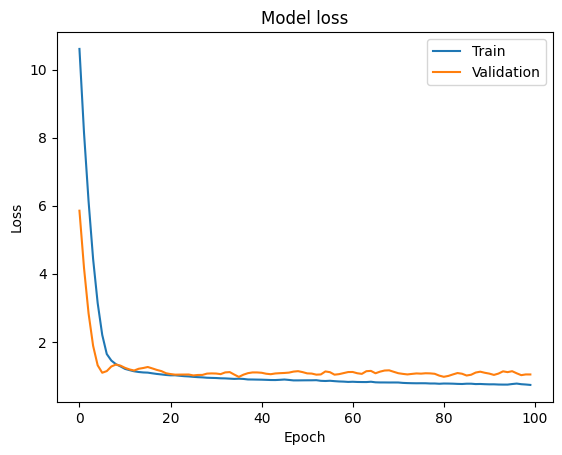

In [2]:
# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loss and accuracy at each epoc
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Early Stopping of Epochs

Epoch 1/100
7/7 [==============================] - 1s 21ms/step - loss: 12.9199 - val_loss: 7.6042
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 9.9240 - val_loss: 5.4955
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 7.6508 - val_loss: 3.9094
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 5.8177 - val_loss: 2.7473
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 4.4057 - val_loss: 1.9146
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 3.2883 - val_loss: 1.4036
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 2.4937 - val_loss: 1.1765
Epoch 8/100
7/7 [==============================] - 0s 6ms/step - loss: 1.9445 - val_loss: 1.1861
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 1.6952 - val_loss: 1.2893
Epoch 10/100
7/7 [==============================] - 0s 48ms/step - loss: 1.5678 - val_loss: 1.3449
Epoch 11/100
7/7 [========

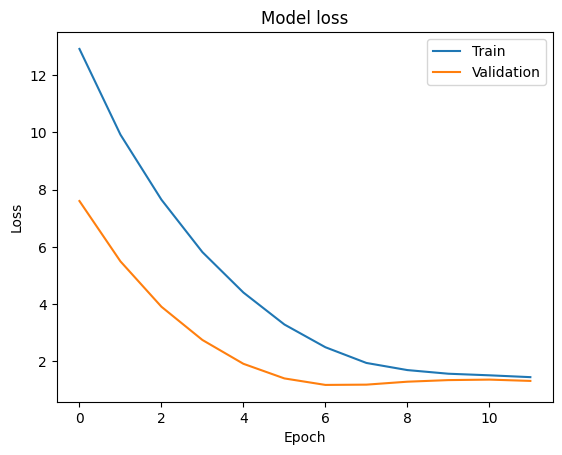

In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Input layer
    tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function
early_stopping = EarlyStopping(patience=5)

# Train the model with the callback function
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

# Evaluating the model (using Mean Squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()